In [1]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data From CSV


  ID: Unique identifier for each patient.
  
  age: Age of the patient in days.
  
  age_years: Age of the patient in years (derived from age).
  
  gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
  
  height: Height of the patient in centimeters.
  
  weight: Weight of the patient in kilograms.
  
  ap_hi: Systolic blood pressure.
  
  ap_lo: Diastolic blood pressure.
  
  cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
  
  gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
  
  smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
  
  alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
  
  active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
  
  cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
  
  bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
  
  bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
  
  bp_category_encoded: Encoded form of bp_category for machine learning purposes.
  

In [2]:
data = pd.read_csv("cardio_data_processed (1).csv")
df =data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [3]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [4]:
df.shape

(68205, 17)

In [5]:
cols_to_remove = ['id','age','bp_category_encoded']
df.drop(cols_to_remove,axis=1,inplace= True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [6]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
 13  bp_category  68205 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 7.3+ MB


In [8]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

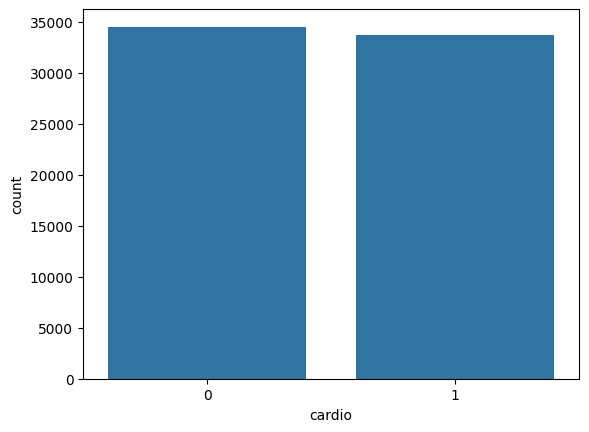

In [9]:
sns.countplot(data= df,x='cardio')

In [10]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Correlations

In [11]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [12]:
categorical = ['gender''cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'bp_category']

numerical = [col for col in df.columns if col not in categorical]

numerical 

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'age_years',
 'bmi']

In [13]:
df[~ df.isin(categorical)]

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [14]:
df[numerical].corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,age_years,bmi
gender,1.000000,0.498323,0.156027,0.060722,0.066126,-0.037397,-0.024098,-0.096512
height,0.498323,1.000000,0.292679,0.018544,0.035550,-0.050957,-0.081974,-0.288037
weight,0.156027,0.292679,1.000000,0.268289,0.250184,0.139816,0.053199,0.763079
ap_hi,0.060722,0.018544,0.268289,1.000000,0.731812,0.195330,0.211314,0.230163
ap_lo,0.066126,0.035550,0.250184,0.731812,1.000000,0.161637,0.155777,0.206944
cholesterol,-0.037397,-0.050957,0.139816,0.195330,0.161637,1.000000,0.154738,0.145234
age_years,-0.024098,-0.081974,0.053199,0.211314,0.155777,0.154738,1.000000,0.085771
bmi,-0.096512,-0.288037,0.763079,0.230163,0.206944,0.145234,0.085771,1.000000


In [15]:
corr = df[numerical].corr()

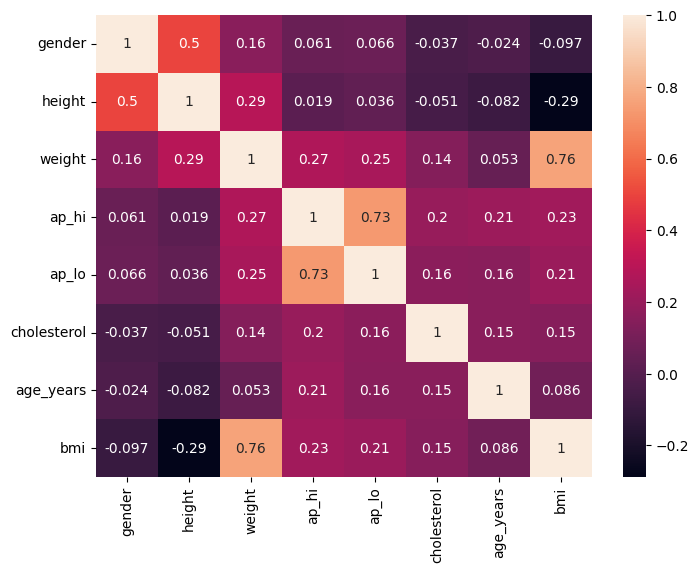

In [16]:
plt.figure(figsize=(8,6))

sns.heatmap(corr,annot=True)

plt.savefig('correaltion-heatmap.jpg')

Columns Distribution and Outliers

In [17]:
numerical

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'age_years',
 'bmi']

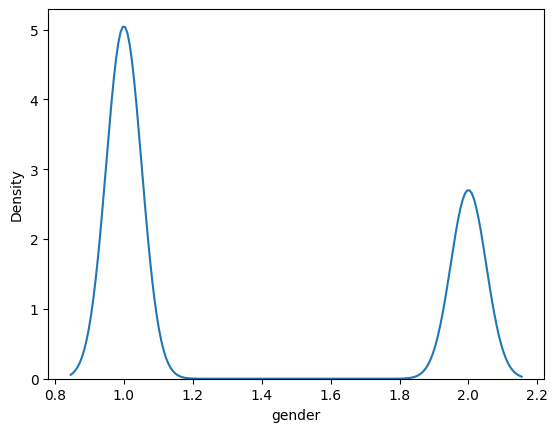

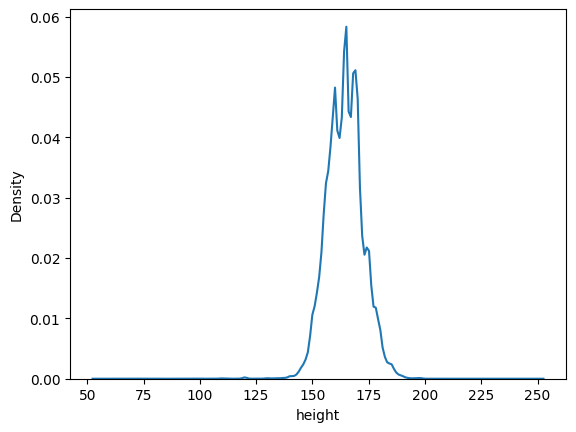

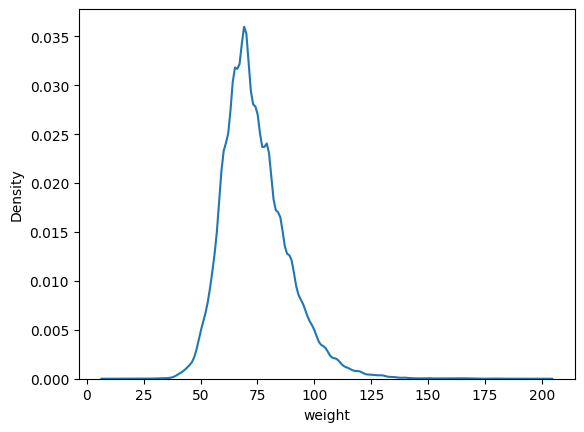

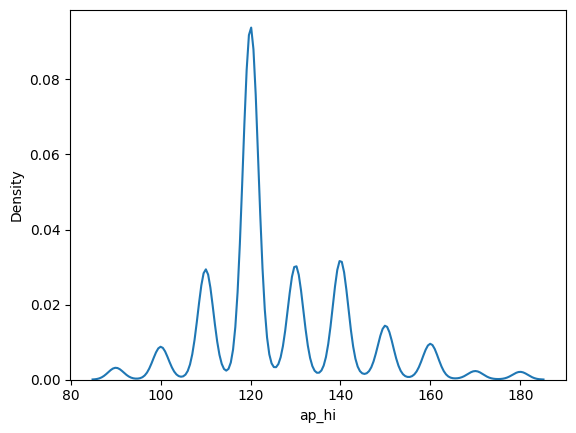

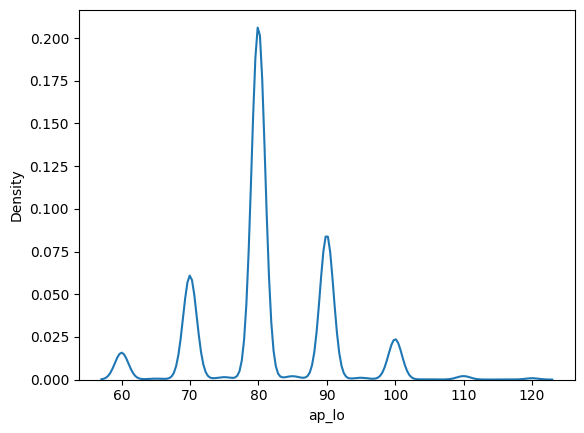

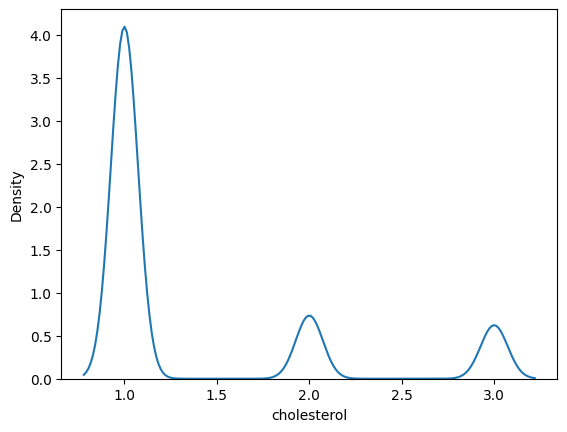

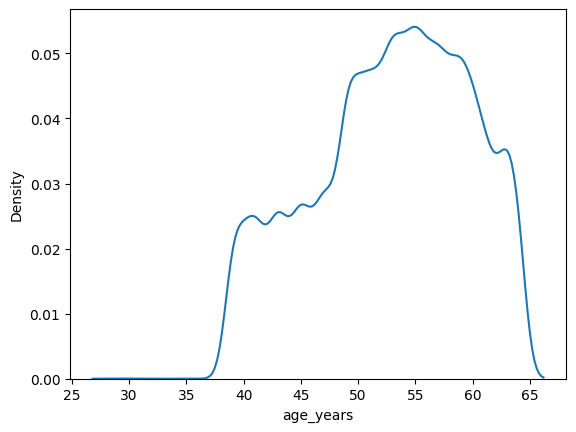

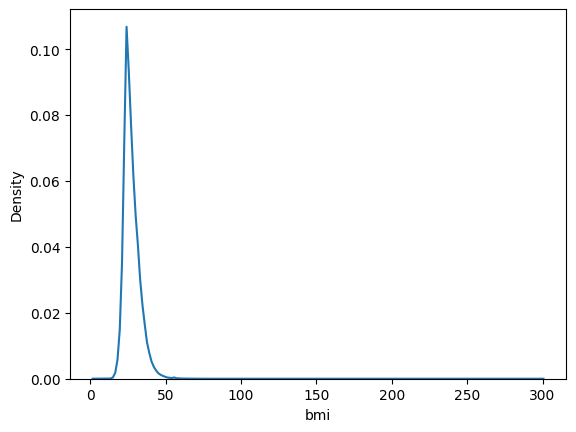

In [18]:
for col in numerical:
    plt.figure()
    sns.kdeplot(df[col])

Height Column

<Axes: ylabel='height'>

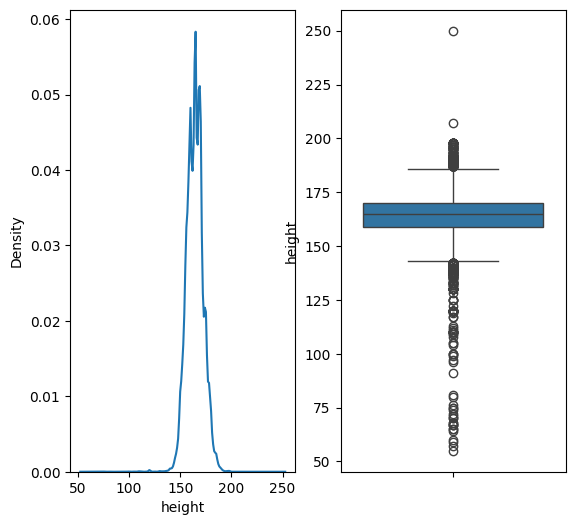

In [19]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])

In [20]:
# IQR,Boundary Values,Pciles,Yeojhson

df['height_log'] = np.log1p(df['height'])

<Axes: ylabel='height_log'>

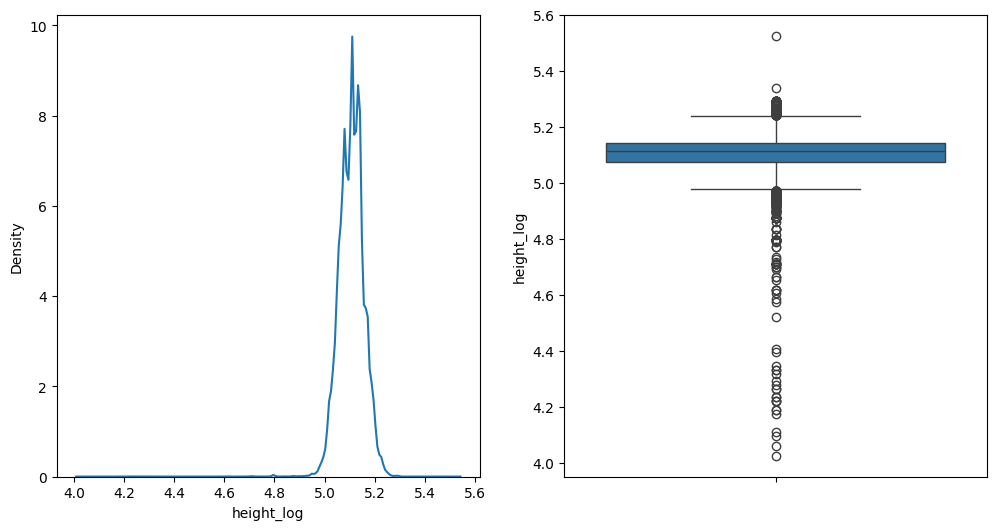

In [21]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_log'],ax=axs[0])
sns.boxplot(df['height_log'],ax=axs[1])

<Axes: ylabel='height_yj'>

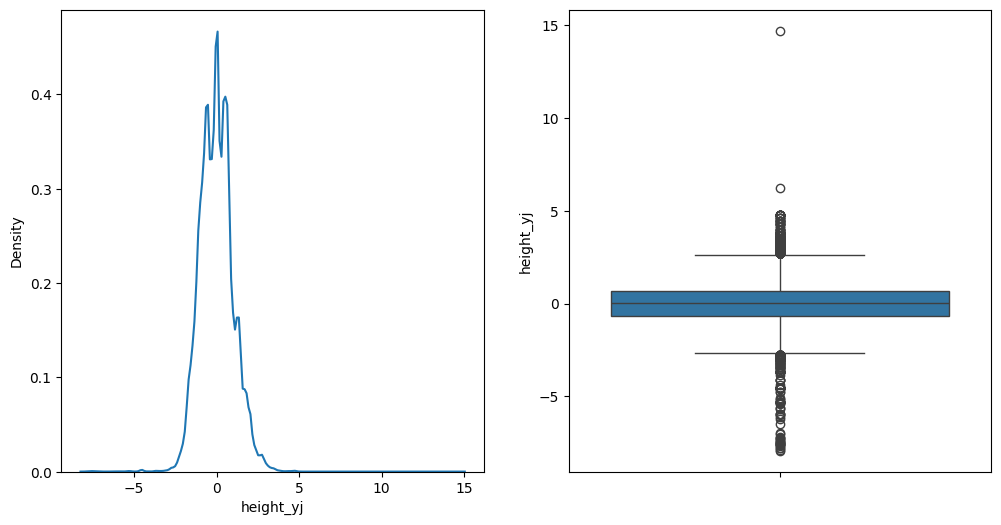

In [22]:
pt = PowerTransformer()

df['height_yj'] = pt.fit_transform(df['height'].values.reshape(-1,1))

fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_yj'],ax=axs[0])
sns.boxplot(df['height_yj'],ax=axs[1])

In [23]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,-1.036468


In [24]:
df.drop(df.columns[-2:],axis=1,inplace=True)

In [25]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


Splitting the data

In [26]:
x = df.drop('cardio',axis=1)
y = df['cardio']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)

In [28]:
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
13070,2,164,84.0,120,80,1,1,1,0,0,48,31.231410,Hypertension Stage 1
42004,2,174,81.0,110,70,1,1,0,0,1,51,26.753864,Normal
42300,1,155,56.0,120,70,1,1,0,0,1,56,23.309053,Elevated
61303,2,162,78.0,140,90,1,1,0,0,1,61,29.721079,Hypertension Stage 2
35880,1,164,82.0,110,80,2,1,0,0,1,46,30.487805,Hypertension Stage 1


In [29]:
y_train.head()

13070    1
42004    0
42300    0
61303    1
35880    0
Name: cardio, dtype: int64

SCALING THE NUMERICAL COLUMNS

In [30]:
numerical

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'age_years',
 'bmi']

In [31]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
                                     ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),["bp_category"])],
                                remainder= 'passthrough')

In [32]:
x_train_transformerd = ct.fit_transform(x_train)

In [33]:
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
13070,2,164,84.0,120,80,1,1,1,0,0,48,31.231410,Hypertension Stage 1
42004,2,174,81.0,110,70,1,1,0,0,1,51,26.753864,Normal
42300,1,155,56.0,120,70,1,1,0,0,1,56,23.309053,Elevated
61303,2,162,78.0,140,90,1,1,0,0,1,61,29.721079,Hypertension Stage 2
35880,1,164,82.0,110,80,2,1,0,0,1,46,30.487805,Hypertension Stage 1


In [34]:
x_train_transformerd

array([[ 1.        , -0.09090909,  0.70588235, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.81818182,  0.52941176, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.90909091, -0.94117647, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.27272727,  1.17647059, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.81818182,  0.47058824, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.52941176, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
ct.get_feature_names_out()

array(['robsc__gender', 'robsc__height', 'robsc__weight', 'robsc__ap_hi',
       'robsc__ap_lo', 'robsc__cholesterol', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gluc', 'remainder__smoke', 'remainder__alco',
       'remainder__active'], dtype=object)

In [36]:
pd.DataFrame(data = x_train_transformerd,
             columns=ct.get_feature_names_out())

,robsc__gender,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__cholesterol,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,1.0,-0.090909,0.705882,0.0,0.0,0.0,-0.5,0.790393,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.818182,0.529412,-0.5,-1.0,0.0,-0.2,0.072964,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,-0.909091,-0.941176,0.0,-1.0,0.0,0.3,-0.478992,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,-0.272727,0.352941,1.0,1.0,0.0,0.8,0.548396,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,-0.090909,0.588235,-0.5,0.0,1.0,-0.7,0.671247,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,1.0,-0.272727,-0.176471,2.0,1.0,1.0,0.2,-0.001084,0.0,1.0,0.0,2.0,0.0,1.0,1.0
51149,1.0,-0.545455,-0.294118,0.5,1.0,0.0,1.1,0.032627,1.0,0.0,0.0,1.0,0.0,0.0,1.0
51150,0.0,-0.272727,1.176471,0.5,0.0,1.0,-0.3,1.403141,1.0,0.0,0.0,1.0,0.0,0.0,1.0
51151,0.0,-0.818182,0.470588,0.0,0.0,0.0,-0.8,1.053440,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
x_test_transformerd =ct.transform(x_test)

In [38]:
x_test_transformerd

array([[ 1.        ,  0.90909091,  1.05882353, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.27272727,  0.58823529, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.27272727, -1.29411765, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.09090909, -0.11764706, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.18181818, -0.52941176, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -2.        , -2.29411765, ...,  0.        ,
         0.        ,  1.        ]])

In [39]:
x_train_transformerd.shape

(51153, 15)

In [40]:
ct.get_feature_names_out()

array(['robsc__gender', 'robsc__height', 'robsc__weight', 'robsc__ap_hi',
       'robsc__ap_lo', 'robsc__cholesterol', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gluc', 'remainder__smoke', 'remainder__alco',
       'remainder__active'], dtype=object)

In [41]:
x_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [42]:
x_test.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

Training The Model
* Decision Tree Classifier
* Random Forest
* Xgboost

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

Dscision Tree

In [44]:
x_test_transformerd

array([[ 1.        ,  0.90909091,  1.05882353, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.27272727,  0.58823529, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.27272727, -1.29411765, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.09090909, -0.11764706, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.18181818, -0.52941176, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -2.        , -2.29411765, ...,  0.        ,
         0.        ,  1.        ]])

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_transformerd,y_train)
pred = dtc.predict(x_test_transformerd)


In [47]:
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
accuracy= accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)
cm = confusion_matrix(y_test,pred)

In [49]:
print(accuracy)
print(recall)
print(cm)

0.6359371334740793
0.6171940298507462
[[5675 3002]
 [3206 5169]]


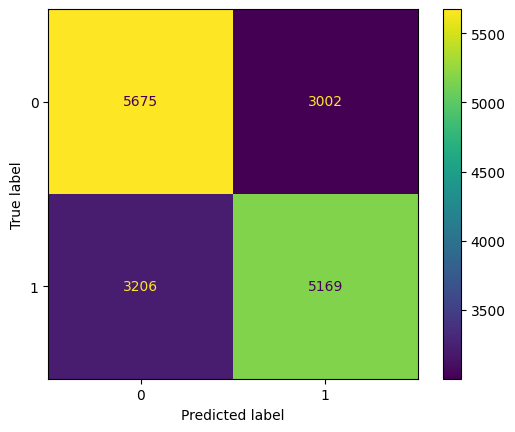

In [50]:
ConfusionMatrixDisplay(cm).plot()

In [51]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion="entropy")
dtc2.fit(x_train_transformerd,y_train)
pred = dtc2.predict(x_test_transformerd)
accuracy= accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)
cm = confusion_matrix(y_test,pred)

In [52]:
print(accuracy)
print(recall)

0.7292986159981234
0.6663880597014925


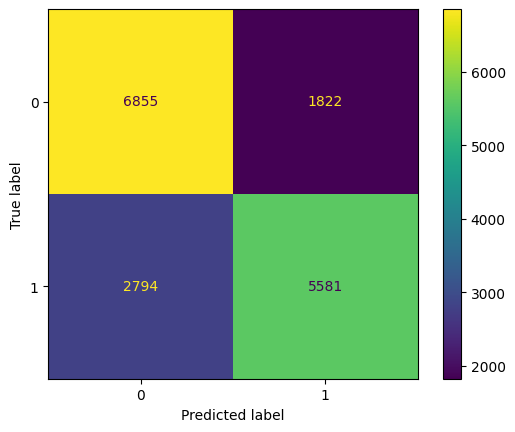

In [53]:
ConfusionMatrixDisplay(cm).plot()

Hypert Tuning Decision Tree

In [54]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [75]:
param_dict = {
               'criterion':['gini','entropy'],
               'max_depth': [5,6,7],
               'max_features': [7,8,10,12,15],
               'min_samples_split': [8,10,12],
                }



randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randomcv.fit(x_train_transformerd,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [76]:
cv_pred = randomcv.predict(x_test_transformerd)
cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7291813277034952


In [77]:
cv_pred = randomcv.predict(x_test_transformerd)
cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)


0.754091708372785


In [83]:
randomcv.best_params_

{'min_samples_split': 8,
 'max_features': 15,
 'max_depth': 5,
 'criterion': 'gini'}

In [79]:
best_dtc = randomcv.best_estimator_

In [80]:
best_dtc

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_split=8)

In [81]:
best_dtc.fit(x_train_transformerd,y_train)
best_pred= best_dtc.predict(x_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.729122683556181
0.7540584415584416


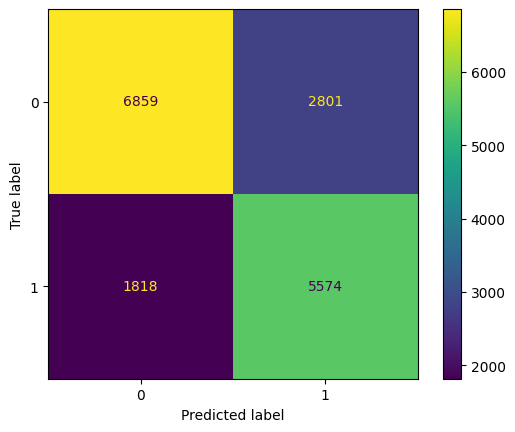

In [82]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()